In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer

In [2]:
import torch
torch.cuda.set_device(1)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [5]:
scaler = StandardScaler()

In [6]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [7]:
dftrain = df[(df.dataset=='train')]
dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])        
dftest.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])                   

In [8]:
dftrain = pd.concat([dftrain,dfvalid])

In [9]:
df = pd.concat([dftrain,dftest])

In [10]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [11]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [12]:
db = DataBlock(blocks = (ImageBlock,
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/'),
                    
                        ],
                 get_y=[#ColReader('species'),
                        #ColReader('water_treatment'),
                        #ColReader('management'),
                        ColReader('plot m2'),
                        ColReader('avg_height'),
                        ColReader('avg_water (L m-2)'),
                        ColReader('N (kg microplot-1)'),
                        ColReader('P (kg microplot-1)'),
                        ColReader('K (kg microplot-1)'),
                        ColReader('final yield (kg)')],
                        # ColReader('GA'),
                        # ColReader('GGA'),
                        # ColReader('CSI'),
                        # ColReader('NGRDIveg'),
                        # ColReader('TGIveg')
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(640),
                 batch_tfms=[*aug_transforms(size=512,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=1)
dls = db.dataloaders(dftrain,bs=4)

In [13]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='volo_yield_all_std_output'), #convnext_yield_all_minmax
    # ReduceLROnPlateau()
]

In [14]:
from fastai.metrics import mae,rmse,mse

In [15]:
class MultiInputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = num_features_model(nn.Sequential(*body.children()))
    self.body = body
    #self.water_treatment = create_head(nf, 4)
    #self.management = create_head(nf, 2)
    self.avg_water = create_head(nf,1)
    self.n = create_head(nf,1)
    self.p = create_head(nf,1)
    self.k = create_head(nf,1)
    self.avg_height = create_head(nf,1)
    self.ga = create_head(nf,1)
    self.gga = create_head(nf,1)
    self.csi = create_head(nf,1)
    self.NGRDIveg = create_head(nf,1)
    self.TGIveg = create_head(nf,1)
    self.yieldprod = create_head(nf,1)

    
    
  
  def forward(self, x):
    y = self.body(x)
    return [
        #self.water_treatment(y),
        #self.management(y),
        self.avg_water(y),
        self.n(y),
        self.p(y),
        self.k(y),
        self.avg_height(y),
        self.ga(y),
        self.gga(y),
        self.csi(y),
        self.NGRDIveg(y),
        self.TGIveg(y),
        self.yieldprod(y)]

In [16]:
from wwf.vision.timm import *

body = create_timm_body('volo_d2_384', pretrained=True)
# body = create_body(resnet50, pretrained=True)
net = MultiInputModel(body)

In [17]:
class CombinationLoss(Module):
    "Cross Entropy Loss on multiple targets"
    def __init__(self, func1=F.cross_entropy,func2=F.mse_loss, weights=[2, 1]):
        self.func1, self.func2, self.w = func2, func2, weights

    def forward(self, xs, *ys, reduction='mean'):
        res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
        for i in range(1,6):
            res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
        res = res + self.func2(ys[6],torch.reshape(xs[6],(4,1)))
        return res
    
#         for i, w, x, y in zip(range(len(xs)), self.w, xs, ys):
#             print(x[1])
#             print(y[1])
#             if i == 0: loss = self.func2(x[1], y[1], reduction=reduction) 
#             else: loss += self.func2(x[1], y[1], reduction=reduction) 
        
#         return loss

In [18]:
learn = Learner(dls, net,  loss_func=CombinationLoss(),cbs=callbacks)

In [19]:
# learn.lr_find()

In [20]:
learn.freeze()

epoch,train_loss,valid_loss,time
0,11.072281,7.365943,00:14
1,10.014684,7.043927,00:14
2,9.092356,7.362787,00:15
3,8.365458,7.241988,00:15
4,7.920136,7.148038,00:14
5,7.688613,6.795559,00:14
6,7.328040,7.133566,00:14
7,7.129631,6.791413,00:15
8,7.018562,6.693806,00:14
9,6.885551,6.768965,00:14


/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torch/_tensor.py:1279: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  ret = func(*args, **kwargs)


Better model found at epoch 0 with valid_loss value: 7.365943431854248.


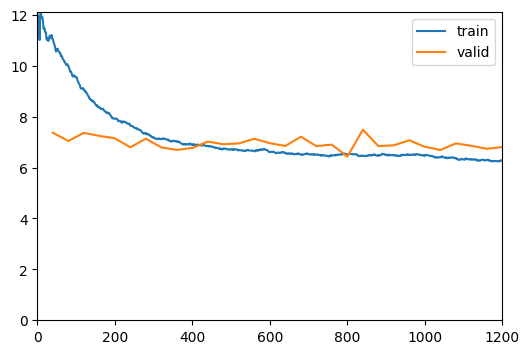

Better model found at epoch 1 with valid_loss value: 7.043927192687988.
Better model found at epoch 5 with valid_loss value: 6.795558929443359.
Better model found at epoch 7 with valid_loss value: 6.791412830352783.
Better model found at epoch 8 with valid_loss value: 6.693805694580078.
Better model found at epoch 19 with valid_loss value: 6.428613185882568.


In [21]:
learn.fit_flat_cos(30,lr=1e-3)

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,6.337968,6.567054,00:16
1,6.302738,6.725935,00:15
2,6.337611,6.692546,00:15
3,6.272213,6.713341,00:15
4,6.343365,6.739589,00:15
5,6.352525,6.695605,00:15
6,6.288048,6.713606,00:15
7,6.320700,6.664786,00:15
8,6.259597,6.749585,00:15
9,6.293202,6.664431,00:14


Better model found at epoch 0 with valid_loss value: 6.56705379486084.


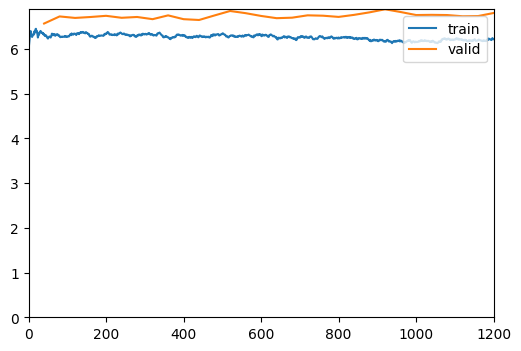

In [23]:
learn.fit_flat_cos(30,lr=1e-4)

In [24]:
dls = db.dataloaders(df,bs=4)

In [25]:
learn.dls=dls

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
preds,gt = learn.get_preds()

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torch/_tensor.py:1279: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  ret = func(*args, **kwargs)


In [28]:
mean_absolute_error(gt[-1]*3.88292+5.30269,preds[-1]*3.88292+5.30269)

4.431482

In [29]:
mean_squared_error(gt[-1]*3.88292+5.30269,preds[-1]*3.88292+5.30269)

23.328098

In [30]:
math.sqrt(mean_squared_error(gt[-1]*3.88292+5.30269,preds[-1]*3.88292+5.30269))

4.829917007270326